Classification Imports

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report




df = pd.read_csv('dataUsed/data.csv')

print(df.head(5)) # display unamed

df = df.loc[:, ~df.columns.str.contains('^Unnamed')] # removes unamed column (https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe)

print(df.head(5))

   Purchase  SUS  Duration  Gender  ASR_Error  Intent_Error  Unnamed: 6
0         1   84       254       0          3             2         NaN
1         0   58       247       0          6             9         NaN
2         0   56       125       1          6             8         NaN
3         0   55        22       0         11             7         NaN
4         1   95       262       0          2             3         NaN
   Purchase  SUS  Duration  Gender  ASR_Error  Intent_Error
0         1   84       254       0          3             2
1         0   58       247       0          6             9
2         0   56       125       1          6             8
3         0   55        22       0         11             7
4         1   95       262       0          2             3


Variable Assignment

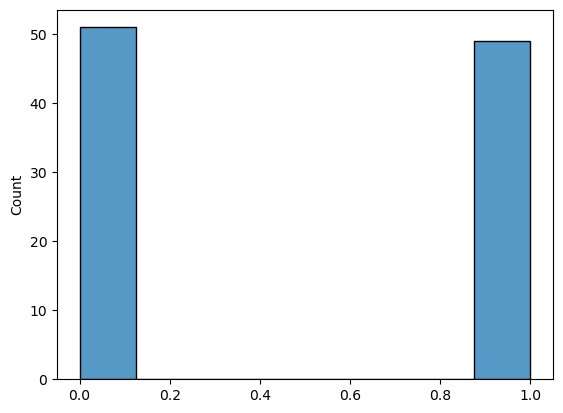

In [6]:
x = df.drop(columns=['Purchase', 'SUS']).to_numpy() # dependent vars
y = df['Purchase'].to_numpy() # independent vars

sns.histplot(data=y, palette='bright')
plt.show()
# display purchase data, nearly even customers did or did not purchase

In [7]:
# data preperation

scale = StandardScaler()
xScale = scale.fit_transform(x)

xTrain, xTest, yTrain, yTest = train_test_split(xScale, y, test_size=0.3)


Models

In [8]:
# load in untrained models

logistic = LogisticRegression()
svc = SVC(probability=True)
gauss = GaussianNB()
randomForest = RandomForestClassifier()



#train models
logistic.fit(xTrain,yTrain)
svc.fit(xTrain,yTrain)
gauss.fit(xTrain,yTrain)
randomForest.fit(xTrain,yTrain)


RandomForestClassifier()

Testing and Prediction

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

              preci

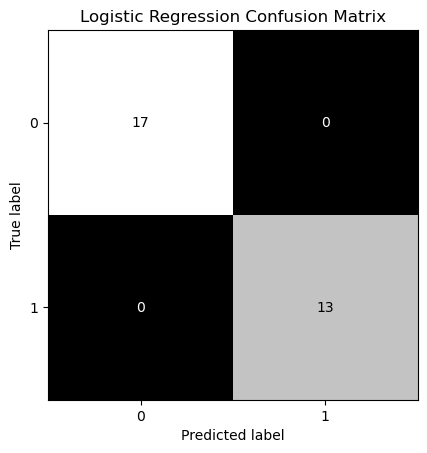

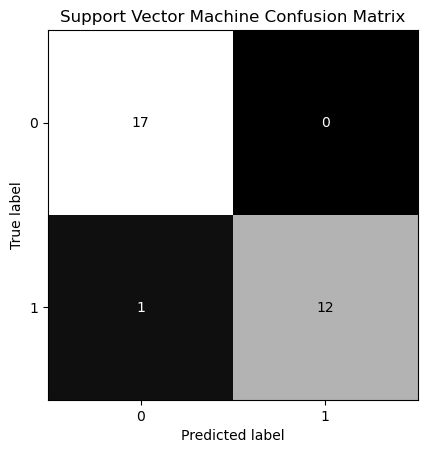

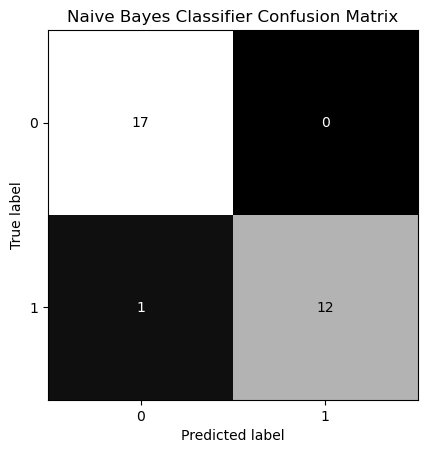

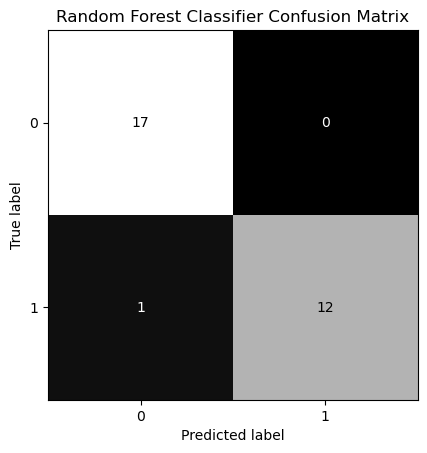

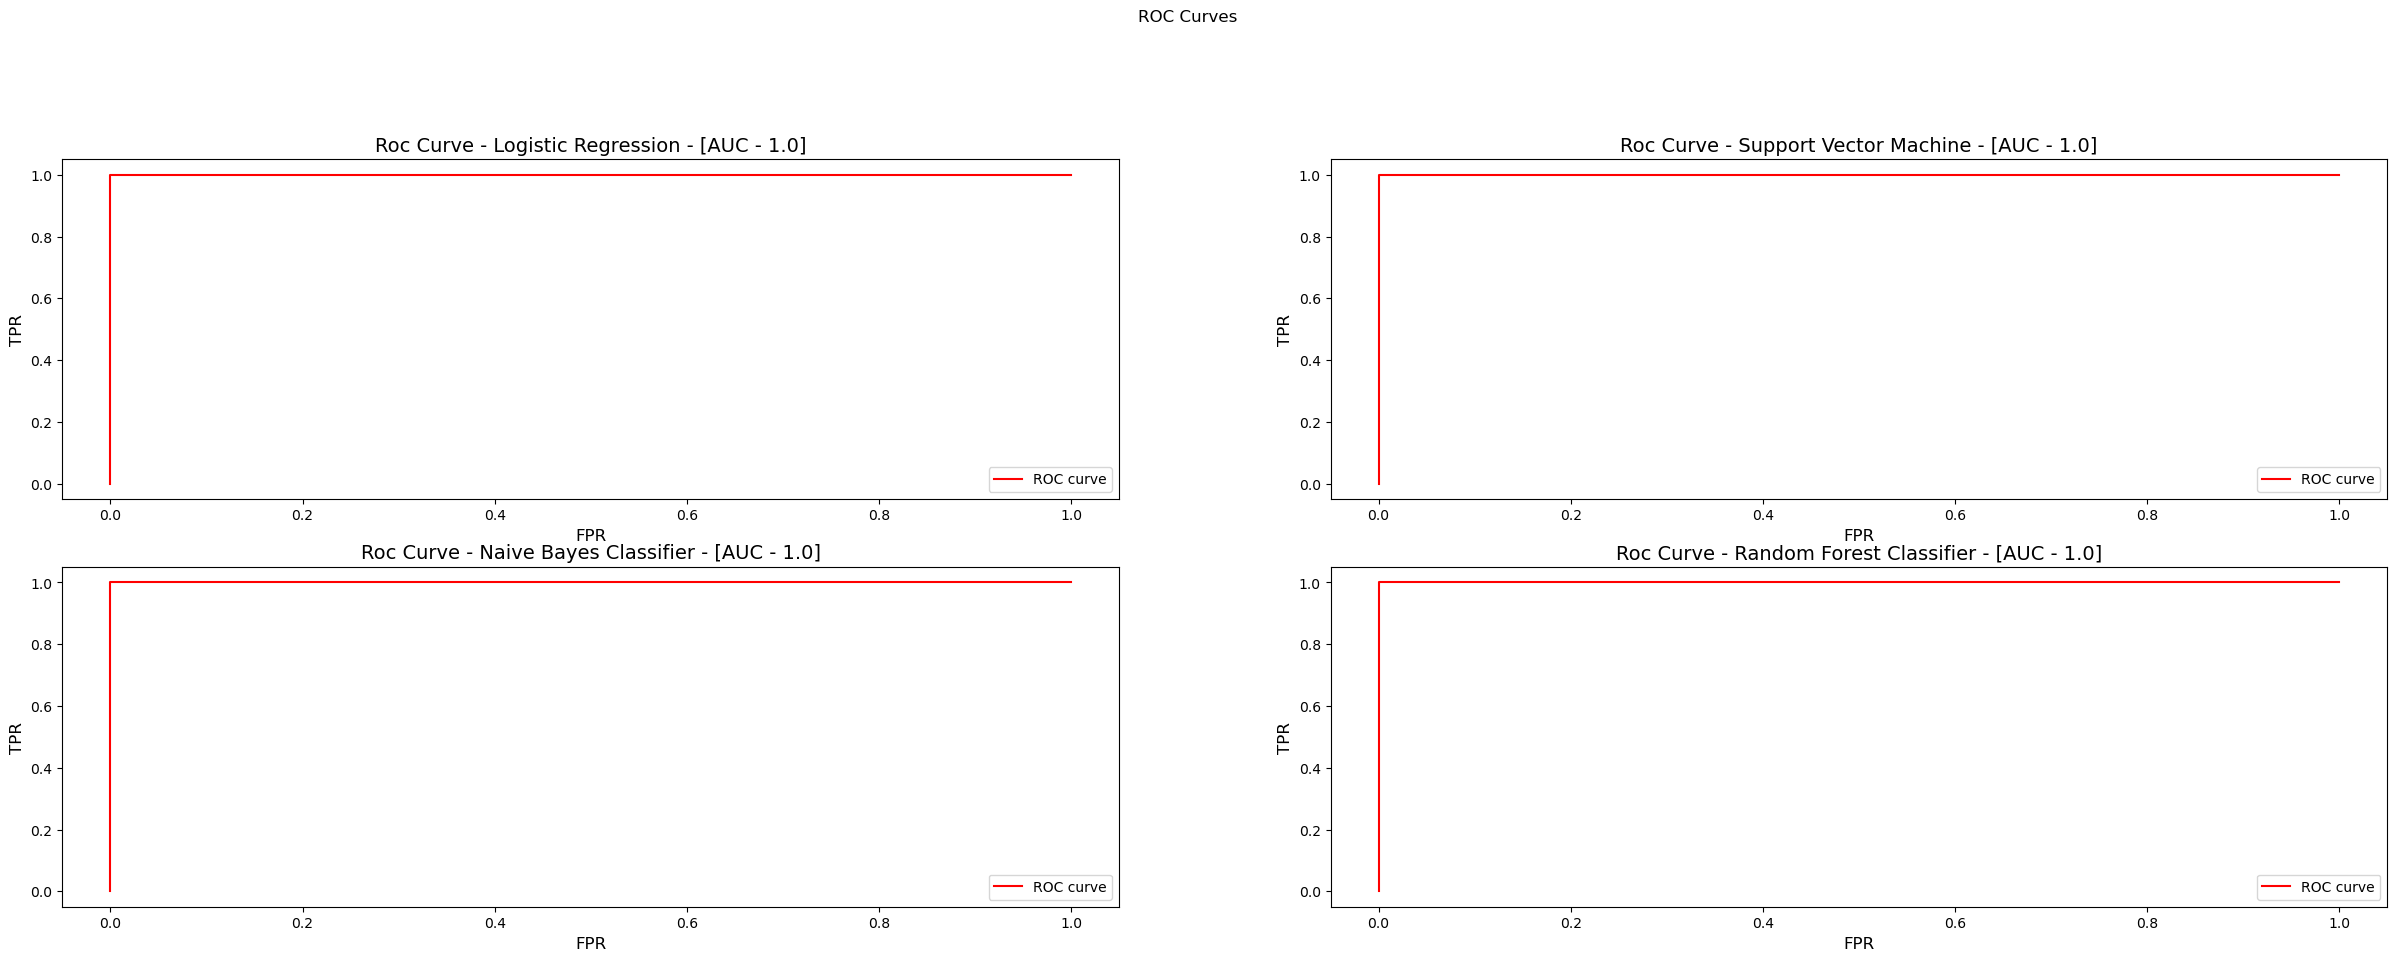

In [9]:
# run trained models over the test data 

yLogisticPredicted = logistic.predict(xTest)
yLogisticPredProba = logistic.predict_proba(xTest)

ySvcPredicted = svc.predict(xTest)
ySvcPredProba = svc.predict_proba(xTest)

yGaussPredicted = gauss.predict(xTest)
yGaussPredProba = gauss.predict_proba(xTest)

yRandomForestPredicted = randomForest.predict(xTest)
yRandomForestPredProba = randomForest.predict_proba(xTest)

# display F1 scores and accuracy 
print(classification_report(yTest, yLogisticPredicted))
print(classification_report(yTest, ySvcPredicted))
print(classification_report(yTest, yGaussPredicted))
print(classification_report(yTest, yRandomForestPredicted))

models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [yLogisticPredicted,  ySvcPredicted, yGaussPredicted, yRandomForestPredicted]
pred_probabilities = [yLogisticPredProba, ySvcPredProba, yGaussPredProba, yRandomForestPredProba]

# Display confusion matrices
for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(yTest.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

# Displays ROC and AUC value
for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(yTest, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()
